In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# a artificial
a_values = pd.read_csv('../../input_data/a/a_values.csv', sep=';', header=None)
#a_rep_gui = pd.read_csv('output/discr_hat_transformer_10_missing_TRANSPOSED.csv', sep=';', header=0)

# b artificial
b_values = pd.read_csv('../../input_data/b/b_values.csv', sep=';', header=None)
#b_rep_gui = pd.read_csv('output/diff_transformer_10_missing.csv', sep=';', header=0)

# theta artificial
theta_values = pd.read_csv('../../input_data/theta/theta_values.csv', sep=';', header=None)
#theta_rep_gui = pd.read_csv('output/thetas_transformer_10_missing.csv', sep=';', header=0)

## Discriminations

In [3]:
a_results = pd.DataFrame(columns=['a_values'])

a_results['a_values'] = a_values

cols = ['Rep' + str(i+1) for i in range(100)]

for i in range(100):
    rep = np.genfromtxt('a/discr_hat_rep' + str(i+1) + '_jml_10_missing_2.csv', delimiter=';').transpose().flatten()
    rep = rep[rep != 0]

    a_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90466/3765047152.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_results['Rep' + str(i+1)] = rep


In [4]:
a_results['Bias'] = np.sum(a_values.values - a_results[cols].values, axis=1)/100
a_results['RMSE'] = np.sqrt(np.sum((a_values.values - a_results[cols])**2, axis=1)/100)
a_results['Abs Bias'] = np.sum(np.abs(a_values.values - a_results[cols].values), axis=1)/100

In [5]:
corrs = []

for column in cols:
    corrs.append(a_results['a_values'].corr(a_results[column]))

a_results['Corr'] = ""
a_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90466/2534136238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_results['Corr'][0] = np.mean(corrs, axis=0)


In [6]:
a_results

,a_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,1.164934,1.197590,1.226376,1.217804,1.206340,1.215968,1.215120,1.185807,1.185710,1.222598,...,1.217466,1.238093,1.207378,1.259891,1.205573,1.227729,-0.045039,0.048666,0.045309,0.592351
1,0.761002,0.836737,0.805159,0.810014,0.803399,0.804388,0.807975,0.801885,0.798528,0.795000,...,0.820705,0.803758,0.814551,0.807659,0.795430,0.831671,-0.048831,0.050361,0.048831,
2,0.823079,0.936640,0.894338,0.927284,0.893708,0.968194,0.902885,0.925711,0.921503,0.907030,...,0.919420,0.886532,0.905329,0.899939,0.900812,0.924251,-0.089913,0.092799,0.089913,
3,1.507663,1.819443,1.859281,1.819946,1.798017,1.854986,1.785925,1.834397,1.803399,1.951675,...,1.848337,1.805805,1.720062,1.873199,1.914244,1.861659,-0.337814,0.341269,0.337814,
4,0.733496,0.860896,0.858414,0.847237,0.853603,0.861058,0.847575,0.871892,0.847025,0.897410,...,0.865896,0.853000,0.846960,0.845793,0.852117,0.890888,-0.117291,0.118901,0.117291,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.819945,1.230289,1.161175,1.268233,1.247971,1.262690,1.253880,1.238899,1.200335,1.300600,...,1.305303,1.258440,1.226889,1.303342,1.319010,1.218657,-0.435590,0.437228,0.435590,
296,1.348967,2.563544,2.843721,2.824844,2.613549,2.738834,2.775318,2.916902,3.133495,2.607920,...,3.006885,2.745335,3.422413,2.700011,3.156280,3.082320,-1.590041,1.604554,1.590041,
297,0.774595,1.261040,1.209532,1.233986,1.263681,1.211362,1.244608,1.323981,1.170024,1.142411,...,1.189898,1.288274,1.186874,1.235877,1.209555,1.284972,-0.457856,0.460880,0.457856,
298,1.662084,31.174330,29.715173,29.434082,31.875273,28.619893,28.942043,28.753314,31.008553,28.319088,...,32.247646,29.232452,29.376517,28.546863,29.951582,31.582805,-28.328718,28.359939,28.328718,


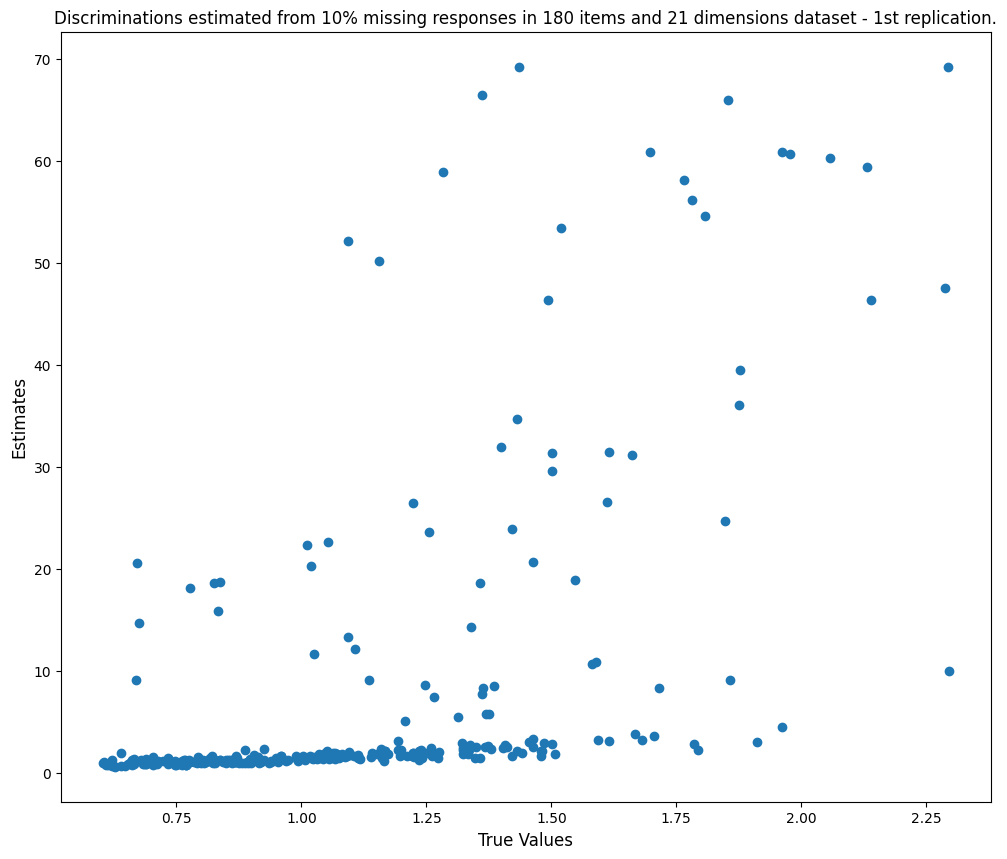

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(x=a_values.T, y=a_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Discriminations estimated from 10% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [8]:
a_results.to_csv('a/a_results.csv', sep=';', header=True, index=False)

## Difficulties

In [9]:
b_results = pd.DataFrame(columns=['b_values'])

b_results['b_values'] = b_values

for i in range(100):
    rep = np.genfromtxt('b/diff_hat_rep' + str(i+1) + '_jml_10_missing_2.csv', delimiter=';')
    b_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90466/65372075.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  b_results['Rep' + str(i+1)] = rep


In [10]:
b_results['Bias'] = np.sum(b_values.values - b_results[cols].values, axis=1)/100
b_results['RMSE'] = np.sqrt(np.sum((b_values.values - b_results[cols])**2, axis=1)/100)
b_results['Abs Bias'] = np.sum(np.abs(b_values.values - b_results[cols].values), axis=1)/100

In [11]:
corrs = []

for column in cols:
    corrs.append(b_results['b_values'].corr(b_results[column]))

b_results['Corr'] = ""
b_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90466/994335258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_results['Corr'][0] = np.mean(corrs, axis=0)


In [12]:
b_results

,b_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-0.516250,-0.687414,-0.715506,-0.673826,-0.752268,-0.767149,-0.730091,-0.712096,-0.674600,-0.722082,...,-0.719115,-0.722639,-0.729628,-0.739454,-0.760107,-0.729461,0.198524,0.200135,0.198524,0.770152
1,-0.403987,-0.529114,-0.511533,-0.499008,-0.554469,-0.556065,-0.516124,-0.545749,-0.493274,-0.542227,...,-0.541999,-0.526631,-0.542657,-0.526922,-0.562590,-0.539106,0.127230,0.128719,0.127230,
2,-1.797941,-2.212721,-2.206735,-2.143526,-2.193317,-2.214727,-2.162469,-2.194474,-2.166727,-2.163939,...,-2.144791,-2.210314,-2.183227,-2.143220,-2.196460,-2.173457,0.387818,0.388925,0.387818,
3,0.763532,3.231319,3.443179,3.039097,3.205472,3.107062,3.311020,3.227941,3.228650,3.247834,...,3.336870,3.467628,3.366413,3.400429,3.776456,3.491415,-2.565392,2.571148,2.565392,
4,-0.787187,-2.011934,-2.092420,-2.044824,-2.167724,-2.021082,-2.011737,-2.246094,-1.809389,-1.937894,...,-2.136194,-1.983373,-1.710022,-1.889404,-1.798656,-1.826960,1.182023,1.188559,1.182023,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.660764,0.544470,0.775800,0.602995,0.883361,0.951962,0.455699,0.819539,0.348460,0.745856,...,0.868252,0.575934,0.735190,0.271959,0.865736,0.930940,-0.070816,0.246648,0.188018,
176,0.928390,0.498397,0.520942,0.477480,0.563446,0.584534,0.528909,0.508637,0.516947,0.540690,...,0.545869,0.517772,0.532995,0.488585,0.544843,0.514143,0.398702,0.399753,0.398702,
177,-2.073206,-2.142945,-2.134307,-2.113063,-2.121455,-2.137128,-2.136271,-2.131339,-2.127952,-2.130175,...,-2.148545,-2.108300,-2.115069,-2.131005,-2.121091,-2.120212,0.053201,0.054290,0.053201,
178,0.197686,0.218198,0.207099,0.185567,0.201008,0.206478,0.198587,0.221528,0.198055,0.219769,...,0.205218,0.213084,0.205176,0.220582,0.205059,0.209470,-0.009076,0.012064,0.010213,


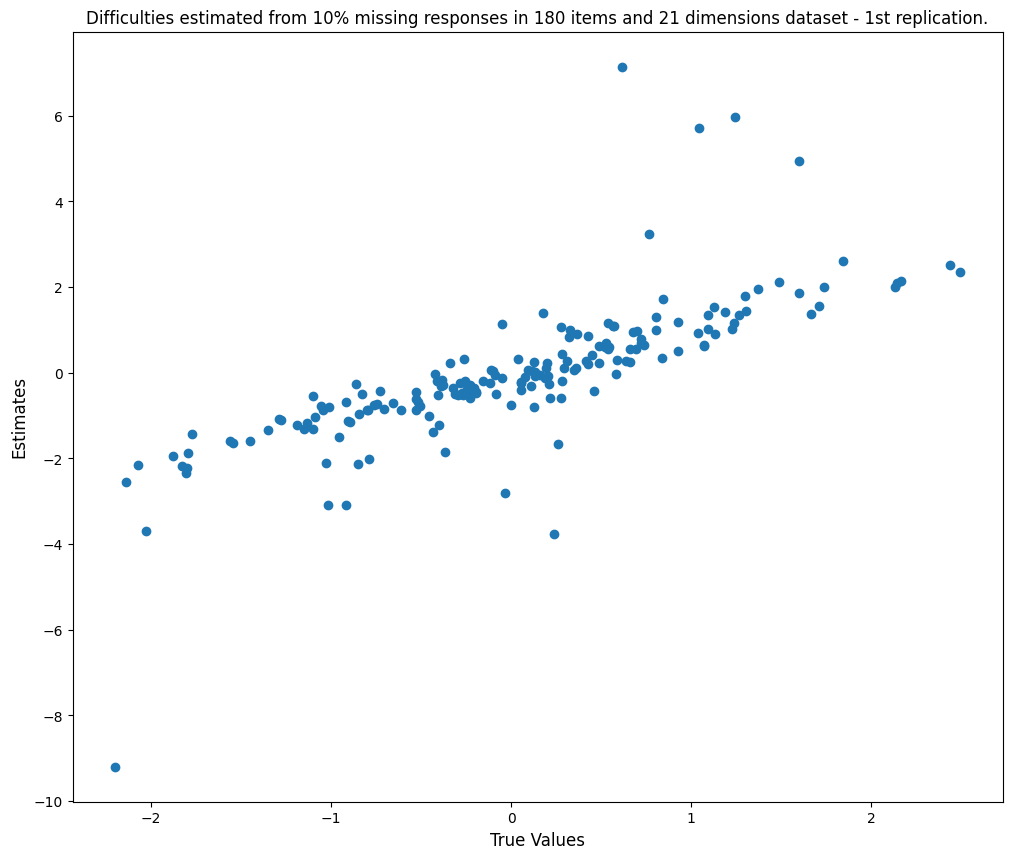

In [14]:
plt.figure(figsize=(12, 10))
plt.scatter(x=b_values.T, y=b_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Difficulties estimated from 10% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [13]:
b_results.to_csv('b/b_results.csv', sep=';', header=True, index=False)

## Thetas

In [15]:
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

In [16]:
theta_results = pd.DataFrame(columns=['theta_values'])

theta_results['theta_values'] = theta_values

for i in range(100):
    rep = np.genfromtxt('theta/thetas_rep' + str(i+1) + '_jml_10_missing_2.csv', delimiter=';').transpose().flatten()
    theta_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90466/1073388120.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theta_results['Rep' + str(i+1)] = rep


In [17]:
theta_values = theta_values.reshape((theta_values.shape[0], 1))
theta_results['Bias'] = np.sum(theta_values - theta_results[cols].values, axis=1)/100
theta_results['RMSE'] = np.sqrt(np.sum((theta_values - theta_results[cols].values)**2, axis=1)/100)
theta_results['Abs Bias'] = np.sum(np.abs(theta_values - theta_results[cols].values), axis=1)/100

In [18]:
corrs = []

for column in cols:
    corrs.append(theta_results['theta_values'].corr(theta_results[column]))

theta_results['Corr'] = ""
theta_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_90466/604505848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theta_results['Corr'][0] = np.mean(corrs, axis=0)


In [19]:
theta_results

,theta_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-1.255686,-1.902740,-1.880598,-1.985249,-2.042416,-2.065018,-2.046297,-1.939157,-1.727734,-1.910206,...,-1.794042,-1.876511,-2.120772,-1.901536,-1.835611,-1.935863,0.667168,0.689271,0.667168,0.712415
1,0.417691,0.021790,-0.029316,0.032200,-0.070259,-0.026209,-0.119431,-0.030615,-0.022111,-0.253110,...,0.084382,0.133598,-0.076069,0.020503,-0.222982,0.202854,0.381518,0.395073,0.381518,
2,-0.218857,-0.232053,-0.491795,-0.391982,-0.399071,-0.352474,-0.600774,-0.532417,-0.498684,-0.219174,...,-0.398781,-0.510229,-0.593324,-0.572495,-0.555365,-0.420585,0.222159,0.268553,0.234944,
3,0.506261,0.470643,0.060906,0.159906,0.066332,-0.038896,0.232316,0.312235,0.453930,0.433536,...,0.003417,0.004639,0.147057,0.001285,0.228614,0.192513,0.293837,0.350445,0.312022,
4,0.165964,-0.418014,0.054625,-0.129546,-0.087485,-0.091517,0.016260,-0.182448,-0.045925,-0.092165,...,-0.225245,-0.169811,-0.205939,-0.057486,-0.410836,-0.068476,0.256355,0.281193,0.256957,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,-1.058072,-1.029322,-0.749687,-0.789441,-0.732130,-0.742310,-0.774023,-1.608380,-0.628772,-0.818268,...,-0.819096,-0.946385,-0.827552,-1.026628,-0.770032,-0.819080,-0.239660,0.335228,0.299627,
167996,-0.292246,0.679923,0.849798,0.640332,0.631924,0.649188,0.643590,0.826910,0.770532,0.716047,...,0.025414,0.705833,0.556058,0.782546,0.657255,0.791833,-0.918212,0.946828,0.918212,
167997,-1.132776,-1.016907,-1.148138,-1.152805,-1.127155,-1.024883,-1.228447,-1.131102,-1.491640,-1.243203,...,-1.389219,-1.566104,-1.092721,-1.343362,-1.176193,-1.283890,0.129481,0.269722,0.165503,
167998,0.537725,-0.034054,-0.038164,-0.075077,-0.028037,-0.028947,-0.155266,-0.036576,-0.106063,-0.028420,...,-0.052490,-0.041510,-0.033613,-0.027387,-0.026547,0.813335,0.534318,0.567112,0.556237,


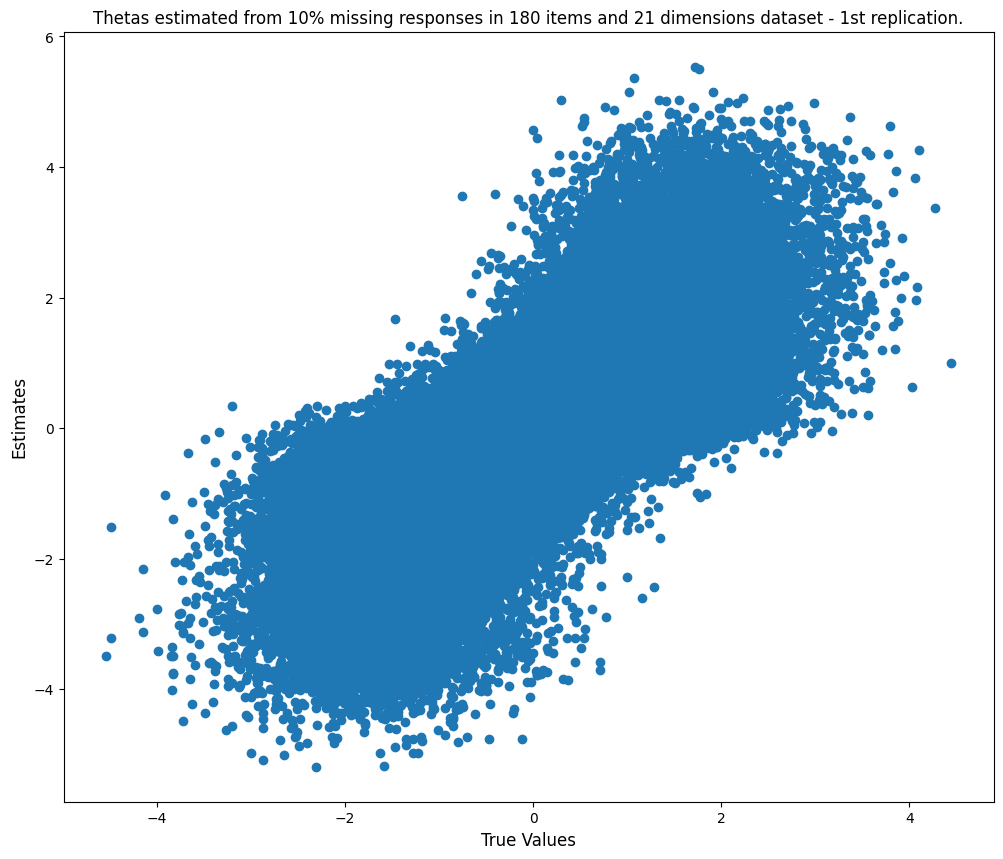

In [20]:
plt.figure(figsize=(12, 10))
plt.scatter(x=theta_values.T, y=theta_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Thetas estimated from 10% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [21]:
theta_results.to_csv('theta/theta_results.csv', sep=';', header=True, index=False)